In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/p7'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/p7/sample_submission.csv
/content/p7/bureau_balance.csv
/content/p7/HomeCredit_columns_description.csv
/content/p7/POS_CASH_balance.csv
/content/p7/previous_application.csv
/content/p7/bureau.csv
/content/p7/credit_card_balance.csv
/content/p7/application_test.csv
/content/p7/installments_payments.csv
/content/p7/application_train.csv


In [ ]:
bureau_balance = pd.read_csv('/content/p7/bureau_balance.csv')
bureau = pd.read_csv('/content/p7/bureau.csv')
credit_card = pd.read_csv('/content/p7/credit_card_balance.csv')
home_credit = pd.read_csv('/content/p7/HomeCredit_columns_description.csv', encoding = "ISO-8859-1")
installments = pd.read_csv('/content/p7/installments_payments.csv')
pos_cash = pd.read_csv('/content/p7/POS_CASH_balance.csv')
previous_app = pd.read_csv('/content/p7/previous_application.csv')
sample_sub = pd.read_csv('/content/p7/sample_submission.csv')
train = pd.read_csv('/content/p7/application_train.csv')
test = pd.read_csv('/content/p7/application_test.csv')

# Fonctions

In [ ]:
def presentation(data, nom):
    print("Le dataframe", nom, "possède", data.shape[0], "lignes et", data.shape[1], "colonnes.")
    print("-"*60)
    print("Il a un total de", round((data.isna().sum().sum()/(data.shape[0]*data.shape[1]))*100,2), "% de valeurs manquantes.")
    print("-"*60)
    plt.figure(figsize=(20, 10))
    sns.heatmap(data.isna(), cbar=False)
    plt.show()
    print("Ci-dessous le % de valeurs manquantes par colonnes :")
    valeurs_nan = pd.DataFrame(round((data.isna().sum()/data.shape[0])*100,2)).rename(columns={0:"% de valeurs manquantes"})
    with pd.option_context('display.max_rows', None):
        display(valeurs_nan)
    print("-"*60)
    print("On peut voir ci-dessous les différentes valeurs contenues dans chaque colonnes :")
    for col in data:
        if data[col].nunique() < 20:
            print (f'{col :-<40} {data[col].unique()}')
        else :
            print(f'{col :-<40} contient {data[col].nunique()} valeurs différentes')
    print("-"*60)
    print(f"{nom} possède {data.duplicated().sum()} doublons.")

    #Proportion des différents types de colonnes
    type_col = data.dtypes.value_counts().index
    proportion = data.dtypes.value_counts().values

    colors = sns.color_palette('pastel')[0:data.dtypes.value_counts().shape[0]]

    #create pie chart
    plt.pie(proportion, labels = type_col, colors = colors, autopct='%1.1f%%')
    plt.show()


In [ ]:
tables = [bureau, credit_card, home_credit, installments, pos_cash, previous_app, sample_sub]
for table in tables:
    print(table.shape)

(1716428, 17)
(1759692, 23)
(219, 5)
(3629937, 8)
(4937642, 8)
(798432, 37)
(48744, 2)


Le dataframe Data train possède 307511 lignes et 122 colonnes.
------------------------------------------------------------
Il a un total de 24.4 % de valeurs manquantes.
------------------------------------------------------------


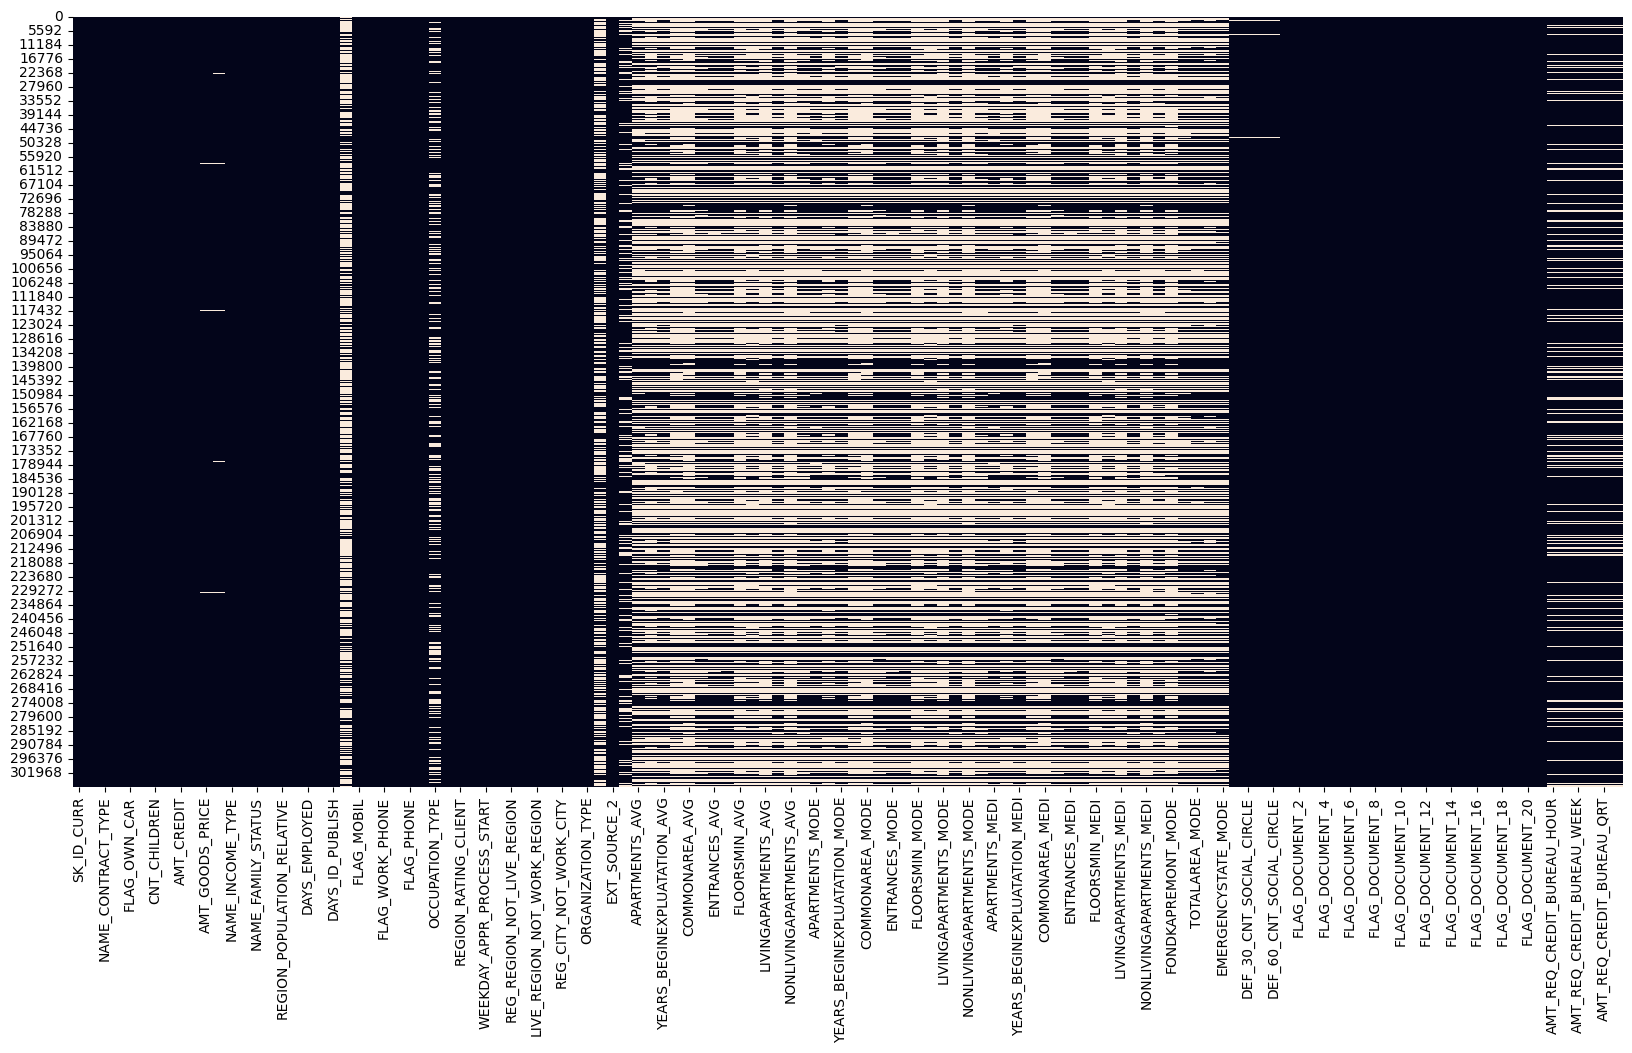

Ci-dessous le % de valeurs manquantes par colonnes :


,% de valeurs manquantes
SK_ID_CURR,0.00
TARGET,0.00
NAME_CONTRACT_TYPE,0.00
CODE_GENDER,0.00
FLAG_OWN_CAR,0.00
FLAG_OWN_REALTY,0.00
CNT_CHILDREN,0.00
AMT_INCOME_TOTAL,0.00
AMT_CREDIT,0.00
AMT_ANNUITY,0.00


------------------------------------------------------------
On peut voir ci-dessous les différentes valeurs contenues dans chaque colonnes :
SK_ID_CURR------------------------------ contient 307511 valeurs différentes
TARGET---------------------------------- [1 0]
NAME_CONTRACT_TYPE---------------------- ['Cash loans' 'Revolving loans']
CODE_GENDER----------------------------- ['M' 'F' 'XNA']
FLAG_OWN_CAR---------------------------- ['N' 'Y']
FLAG_OWN_REALTY------------------------- ['Y' 'N']
CNT_CHILDREN---------------------------- [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL------------------------ contient 2548 valeurs différentes
AMT_CREDIT------------------------------ contient 5603 valeurs différentes
AMT_ANNUITY----------------------------- contient 13672 valeurs différentes
AMT_GOODS_PRICE------------------------- contient 1002 valeurs différentes
NAME_TYPE_SUITE------------------------- ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 '

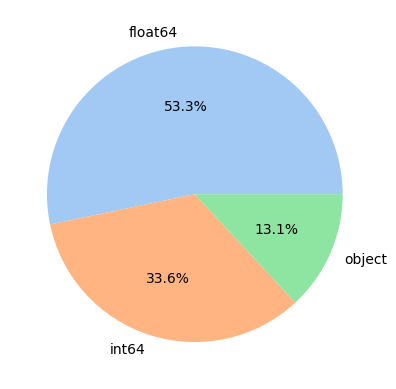

In [ ]:
presentation(train, "Data train")

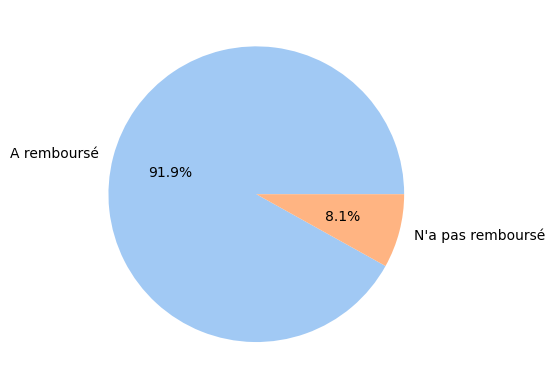

In [ ]:
#Proportion d'individu ayant remboursé / pas remboursé
type_col = train['TARGET'].value_counts().index
proportion = train['TARGET'].value_counts().values/train['TARGET'].shape[0]

colors = sns.color_palette('pastel')[0:train['TARGET'].value_counts().shape[0]]

#create pie chart
plt.pie(proportion, colors = colors, autopct='%1.1f%%', labels=["A remboursé", "N'a pas remboursé"])
plt.show()

Le dataframe Data test possède 48744 lignes et 121 colonnes.
------------------------------------------------------------
Il a un total de 23.81 % de valeurs manquantes.
------------------------------------------------------------


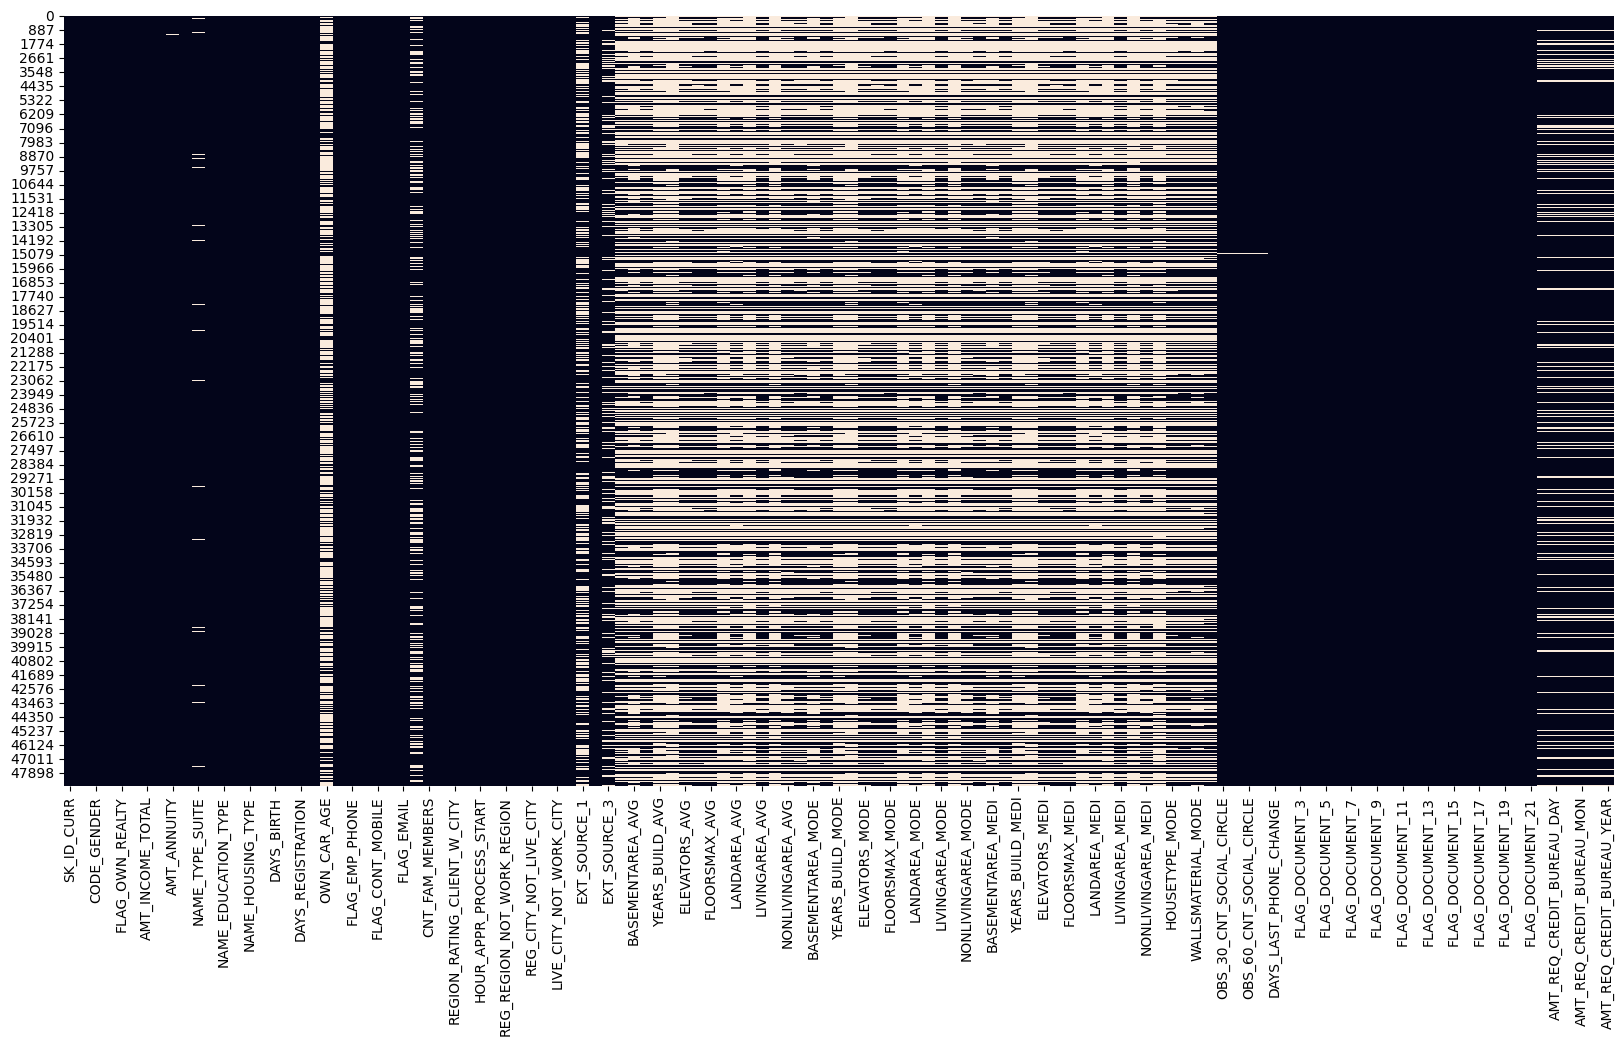

Ci-dessous le % de valeurs manquantes par colonnes :


,% de valeurs manquantes
SK_ID_CURR,0.00
NAME_CONTRACT_TYPE,0.00
CODE_GENDER,0.00
FLAG_OWN_CAR,0.00
FLAG_OWN_REALTY,0.00
CNT_CHILDREN,0.00
AMT_INCOME_TOTAL,0.00
AMT_CREDIT,0.00
AMT_ANNUITY,0.05
AMT_GOODS_PRICE,0.00


------------------------------------------------------------
On peut voir ci-dessous les différentes valeurs contenues dans chaque colonnes :
SK_ID_CURR------------------------------ contient 48744 valeurs différentes
NAME_CONTRACT_TYPE---------------------- ['Cash loans' 'Revolving loans']
CODE_GENDER----------------------------- ['F' 'M']
FLAG_OWN_CAR---------------------------- ['N' 'Y']
FLAG_OWN_REALTY------------------------- ['Y' 'N']
CNT_CHILDREN---------------------------- [ 0  2  1  3  8  4  6  5  7 20 11]
AMT_INCOME_TOTAL------------------------ contient 606 valeurs différentes
AMT_CREDIT------------------------------ contient 2937 valeurs différentes
AMT_ANNUITY----------------------------- contient 7491 valeurs différentes
AMT_GOODS_PRICE------------------------- contient 677 valeurs différentes
NAME_TYPE_SUITE------------------------- ['Unaccompanied' nan 'Family' 'Spouse, partner' 'Group of people'
 'Other_B' 'Children' 'Other_A']
NAME_INCOME_TYPE------------------------ 

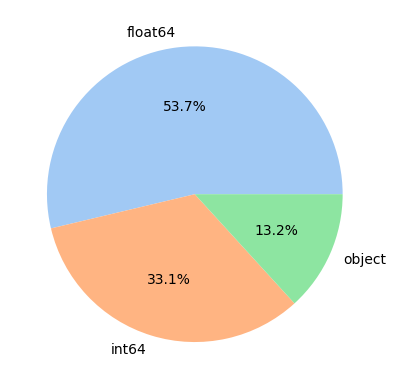

In [ ]:
presentation(test, "Data test")

Faire test de correspondance des 2 dataframes, colonnes qui coincide ? valeurs des colonnes qui coincident ?

In [ ]:
def colonne_diff(df1, df2):
    return df1.columns.difference(df2.columns), df1.columns.difference(df2.columns)

In [ ]:
x, y = colonne_diff(train, test)
print("Nombre de colonnes dans train et non dans test : ", len(x), ". Nombre de colonnes présentent dans test et non dans train : ", len(y), ".")
print(f"L'unique colonne présente dans train et pas dans test est : {x[0]}. Toutes les colonnes de test sont dans train.")

Nombre de colonnes dans train et non dans test :  1 . Nombre de colonnes présentent dans test et non dans train :  1 .
L'unique colonne présente dans train et pas dans test est : TARGET. Toutes les colonnes de test sont dans train.


In [ ]:
def compare_object_column_values(df1, df2):
    unique_values = {}

    for column in df1.select_dtypes(include=['object']).columns.intersection(df2.select_dtypes(include=['object']).columns):
        values_df1_not_in_df2 = df1[column][~df1[column].isin(df2[column])].drop_duplicates().tolist()
        values_df2_not_in_df1 = df2[column][~df2[column].isin(df1[column])].drop_duplicates().tolist()

        if values_df1_not_in_df2 or values_df2_not_in_df1:
            unique_values[column] = {
                'values_in_df1_not_in_df2': values_df1_not_in_df2,
                'values_in_df2_not_in_df1': values_df2_not_in_df1
            }

    return unique_values

# Création de deux DataFrames de démonstration
data1 = {'A': ['foo', 'bar', 'baz'],
         'B': ['apple', 'banana', 'cherry'],
         'C': ['one', 'two', 'three']}
df1 = pd.DataFrame(data1)

data2 = {'B': ['apple', 'banana', 'berry'],
         'C': ['one', 'three', 'four'],
         'D': ['dog', 'elephant', 'fish']}
df2 = pd.DataFrame(data2)

unique_values = compare_object_column_values(train, test)

if not unique_values:
    print("Aucune valeur unique détectée dans les colonnes objets similaires.")
else:
    print("Valeurs uniques détectées dans les colonnes objets similaires:")
    for column, values in unique_values.items():
        print(f"Colonne '{column}':")
        print(f"Valeurs dans df1 mais pas dans df2: {values['values_in_df1_not_in_df2']}")
        print(f"Valeurs dans df2 mais pas dans df1: {values['values_in_df2_not_in_df1']}")
        print()

Valeurs uniques détectées dans les colonnes objets similaires:
Colonne 'CODE_GENDER':
Valeurs dans df1 mais pas dans df2: ['XNA']
Valeurs dans df2 mais pas dans df1: []

Colonne 'NAME_INCOME_TYPE':
Valeurs dans df1 mais pas dans df2: ['Maternity leave']
Valeurs dans df2 mais pas dans df1: []

Colonne 'NAME_FAMILY_STATUS':
Valeurs dans df1 mais pas dans df2: ['Unknown']
Valeurs dans df2 mais pas dans df1: []



On décide de supprimer les individus XNA.

In [ ]:
#Sélection des individus n'étant pas XNA
train = train.loc[train['CODE_GENDER'] != 'XNA', :]

In [ ]:
train = train.loc[train['NAME_INCOME_TYPE'] != 'Maternity leave',:]

In [ ]:
train = train.loc[train['NAME_FAMILY_STATUS'] != 'Unknown', :]

In [ ]:
train.loc[:, train.dtypes == object]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [ ]:
cols_to_clean = ["NAME_CONTRACT_TYPE",
        "NAME_TYPE_SUITE",
        "NAME_INCOME_TYPE",
        "NAME_EDUCATION_TYPE",
        "ORGANIZATION_TYPE",
        "FONDKAPREMONT_MODE",
        "OCCUPATION_TYPE",
        "WALLSMATERIAL_MODE",
        "HOUSETYPE_MODE",
        "NAME_HOUSING_TYPE",
        "NAME_FAMILY_STATUS"]

In [ ]:
train["NAME_CONTRACT_TYPE"]

0              Cash loans
1              Cash loans
2         Revolving loans
3              Cash loans
4              Cash loans
               ...       
307506         Cash loans
307507         Cash loans
307508         Cash loans
307509         Cash loans
307510         Cash loans
Name: NAME_CONTRACT_TYPE, Length: 307500, dtype: object

In [ ]:
def cleaning_categories(col):
    '''
    Fonction qui nettoie une phrase de ses caractères spéciaux.
    Et la passe en majuscule (pour un passage en nom de colonne avec one hot)
    '''
    col = str(col).replace('-', '').replace('+', '').replace('/', ' ').replace(':', '_')
    col = str(col).upper()
    return col

In [ ]:
for cols in cols_to_clean:
    train[cols] = train[cols].apply(lambda x : cleaning_categories(x))

In [ ]:
for cols in cols_to_clean:
    test[cols] = test[cols].apply(lambda x : cleaning_categories(x))

In [ ]:
train["NAME_CONTRACT_TYPE"]

0              CASH LOANS
1              CASH LOANS
2         REVOLVING LOANS
3              CASH LOANS
4              CASH LOANS
               ...       
307506         CASH LOANS
307507         CASH LOANS
307508         CASH LOANS
307509         CASH LOANS
307510         CASH LOANS
Name: NAME_CONTRACT_TYPE, Length: 307500, dtype: object

## Gestion des Outliers

In [ ]:
with pd.option_context('display.max_rows', None):
    display(train.describe().iloc[:, 1:].T)

,count,mean,std,min,25%,50%,75%,max
TARGET,307500.0,0.080725,0.272413,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307500.0,0.417034,0.722108,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307500.0,168797.123450,237126.307223,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307500.0,599025.945351,402493.590146,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307488.0,27108.477604,14493.600189,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307224.0,538394.285593,369445.877860,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307500.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307500.0,-16037.069246,4363.988872,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307500.0,63817.429333,141277.730537,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307500.0,-4986.152449,3522.883278,-2.467200e+04,-7479.250000,-4504.000000,-2010.000000,0.000000e+00


In [ ]:
train["CNT_CHILDREN"].value_counts()

0     215366
1      61117
2      26745
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

Certains individus ont plus de 10 enfants, on pourrait dans un premier temps que ces valeurs sont des outliers mais cela est possible. De plus, au vue du peu d'individu présentant cette spécificité, cela reste raisonnable (statistiquement parlant), on décide donc de garder ces valeurs.

In [ ]:
train["AMT_INCOME_TOTAL"].sort_values()

1678          25650.0
20727         25650.0
240137        26100.0
186643        26100.0
246104        26100.0
             ...     
131127      6750000.0
77768       9000000.0
246858     13500000.0
203693     18000090.0
12840     117000000.0
Name: AMT_INCOME_TOTAL, Length: 307500, dtype: float64

117 million bien que cela paraisse très grand reste possible, on ne l'écarte donc pas.

In [ ]:
train["AMT_CREDIT"].sort_values()

246609      45000.0
174802      45000.0
226019      45000.0
154210      45000.0
6583        45000.0
            ...    
120757    4050000.0
288455    4050000.0
133766    4050000.0
17948     4050000.0
110459    4050000.0
Name: AMT_CREDIT, Length: 307500, dtype: float64

Crédit accordé sur une tranche de valeurs correct relativement aux sommes des revenus.

Pas assez d'information sur "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"et "DEF_60_CNT_SOCIAL_CIRCLE". Valeurs étranges selon la compréhension. On laisse comme cela pour le moment.

Hormis pour les colonnes qui commencent par DAYS et celles relevées ci-dessus, aucun outlier n'apparait et l'ensemble des valeurs semblent être correct. Etudions plus en détails les colonnes commençant par DAYS.

DAYS_BIRTH répertorie la date de naissance des clients exprimées en jour. Les valeurs sont négatives car elles expriment un évènement passé. Voyons si le min et le max paraissent être "normal". Le min étant 25 229 jours, cela équivaut à 25 229 / 365 = 69 ans pour le client le plus âgé et pour le max -7 489 / 365 = 20 ans et demi pour le client le plus jeune. Cela reste des valeurs toute à fait normales.

DAYS_EMPLOYED répertorie la durée (en jour) écoulée entre la premier jour de son actuel travail et la demande de crédit. Ici, aussi les valeurs sont négatives car elles font références à un évènement passé. On observe cependant que le max est positive, cela n'a aucun sens. Voyons plus en détails les plus grandes valeurs.

In [ ]:
train['DAYS_EMPLOYED'].sort_values().tail(30)

112431    365243
112439    365243
247203    365243
247189    365243
112464    365243
112465    365243
112467    365243
112471    365243
112474    365243
112478    365243
112458    365243
247231    365243
247204    365243
247207    365243
247227    365243
247225    365243
112397    365243
247222    365243
112401    365243
247220    365243
112416    365243
247219    365243
112405    365243
247216    365243
247214    365243
247211    365243
247209    365243
247208    365243
112403    365243
100257    365243
Name: DAYS_EMPLOYED, dtype: int64

On observe que beaucoup de valeurs sont positives, de plus elles sont exactement similaire avec comme valeurs 365 243.

In [ ]:
print(f"{round((train[train['DAYS_EMPLOYED'] == 365243]['DAYS_EMPLOYED'].shape[0]/train.shape[0])*100, 2)}% des valeurs sont 365 243.")

18.01% des valeurs sont 365 243.


Comme ces valeurs n'ont aucun sens et qu'on a pas d'explication dans la description des colonnes, on considère cette valeur comme une anomalie. Pour la traiter on les remplaces alors par np.NaN.

In [ ]:
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [ ]:
train['DAYS_EMPLOYED'].describe()

count    252126.000000
mean      -2384.150631
std        2338.349929
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

On a plus de valeurs positives, le traitement s'est donc bien passé.

"DAYS_REGISTRATION" répertorie le nombre de jour écoulé entre la demande de crédit et les dernières modifications de son inscription. En regardant le min, 4986 / 365 = 13 ans et demi et le max est 0 jour (donc le jour actuel), ce qui reste très correct.

"DAYS_ID_PUBLISH" contient les périodes entre le changement de pièce d'identité et la demande de crédit. Aucune valeurs semble incorrect.

# Analyse Multivariée

## Corrélation

On aimerait étudier les corrélations entre la variable cible TARGET et les autres pour peut être observer des tendances. Pour ce faire, on étudie tout d'abord les corrélations.

On va rechercher les corrélations les plus significatives, c'est à dire celles qui ont la plus grande valeurs (de manière absolue).

In [ ]:
np.abs(train.corr()['TARGET']).sort_values().tail(30)

<ipython-input-29-7c77d9943540>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.abs(train.corr()['TARGET']).sort_values().tail(30)


LIVE_CITY_NOT_WORK_CITY        0.032500
TOTALAREA_MODE                 0.032600
FLOORSMIN_MODE                 0.032700
LIVINGAREA_MEDI                0.032743
LIVINGAREA_AVG                 0.033001
FLOORSMIN_MEDI                 0.033397
FLOORSMIN_AVG                  0.033616
ELEVATORS_MEDI                 0.033864
ELEVATORS_AVG                  0.034200
REGION_POPULATION_RELATIVE     0.037223
OWN_CAR_AGE                    0.037625
AMT_GOODS_PRICE                0.039671
DAYS_REGISTRATION              0.041950
FLOORSMAX_MODE                 0.043228
FLOORSMAX_MEDI                 0.043770
FLOORSMAX_AVG                  0.044005
FLAG_DOCUMENT_3                0.044371
REG_CITY_NOT_LIVE_CITY         0.044401
FLAG_EMP_PHONE                 0.045978
REG_CITY_NOT_WORK_CITY         0.050981
DAYS_ID_PUBLISH                0.051455
DAYS_LAST_PHONE_CHANGE         0.055228
REGION_RATING_CLIENT           0.058882
REGION_RATING_CLIENT_W_CITY    0.060875
DAYS_EMPLOYED                  0.074973


On définie un seuil de 5% de corrélation pour considérer la variable "importante".

In [ ]:
var_importantes = np.abs(train.corr()['TARGET']).sort_values()

#Liste qui répertorie les colonnes ayant au moins 5% de corrélations positives / négatives avec TARGET
var_corr = list(var_importantes[var_importantes > 0.05].index)

<ipython-input-30-0ab8be768997>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  var_importantes = np.abs(train.corr()['TARGET']).sort_values()


Voyons lesquelles sont corrélées positivement et celles négativement à TARGET.

In [ ]:
#Corrélations Négatives
train.corr()['TARGET'].sort_values().head(10)

<ipython-input-31-aff81dfcbc1b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['TARGET'].sort_values().head(10)


EXT_SOURCE_3                 -0.178926
EXT_SOURCE_2                 -0.160451
EXT_SOURCE_1                 -0.155333
FLOORSMAX_AVG                -0.044005
FLOORSMAX_MEDI               -0.043770
FLOORSMAX_MODE               -0.043228
AMT_GOODS_PRICE              -0.039671
REGION_POPULATION_RELATIVE   -0.037223
ELEVATORS_AVG                -0.034200
ELEVATORS_MEDI               -0.033864
Name: TARGET, dtype: float64

On observe que les variables EXT_SOURCE sont très anticorrélées à TARGET. On sait seulement que ces variables sont des scores de données exterieures.

In [ ]:
train.corr()['TARGET'].sort_values().tail(10)

<ipython-input-32-f73958574907>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['TARGET'].sort_values().tail(10)


REG_CITY_NOT_LIVE_CITY         0.044401
FLAG_EMP_PHONE                 0.045978
REG_CITY_NOT_WORK_CITY         0.050981
DAYS_ID_PUBLISH                0.051455
DAYS_LAST_PHONE_CHANGE         0.055228
REGION_RATING_CLIENT           0.058882
REGION_RATING_CLIENT_W_CITY    0.060875
DAYS_EMPLOYED                  0.074973
DAYS_BIRTH                     0.078236
TARGET                         1.000000
Name: TARGET, dtype: float64

Ici on voit que les variables DAYS ont les plus grandes corrélations positives avec TARGET. Elles ont donc de légère tendance similaires. En voici une interprétation (Attention, ces dernières sont négatives c'est donc une anticorrélation) :
- Plus un client est âgé, plus il y a de chance qu'il rembourse le prêt.
- Plus le client a de l'ancienneté dans son travail actuel, plus il y a de chance qu'il rembourse son prêt.
- Plus le téléphone du client est ancien, plus il y a de chance qu'il rembourse son prêt (surprenant).
- Plus les l'actualisation des documents d'identités du client a été faites il y a longtemps, plus il y a de chance qu'il rembourse son prêt. (surprenant également).
\
\
La localisation avec les variables REGION viennent ensuite :
- Plus la note associée à la région dans laquelle le client vit est grande, moins le client à de chance de rembourser.
- Plus la note associée au couple région/ville dans laquelle le client vit est grande, moins le client à de chance de rembourser.
\
\
Enfin on a les variables REG_CITY:
- Si l'adresse permanente est différente de l'adresse communiquée alors le client aura tendance à moins rembourser.
- Si l'adresse permanente est différente de l'adresse du travail alors le client aura tendance à moins rembourser.

On peut maintenant construire un tableau de corrélation autour de ces variables :

In [ ]:
#Suppression de 'REG_CITY_NOT_WORK_CITY' car variable catégorielle
var_corr.remove('REG_CITY_NOT_WORK_CITY')

In [ ]:
#On mets TARGET en première position
dernier_element = var_corr.pop()
var_corr.insert(0, dernier_element)

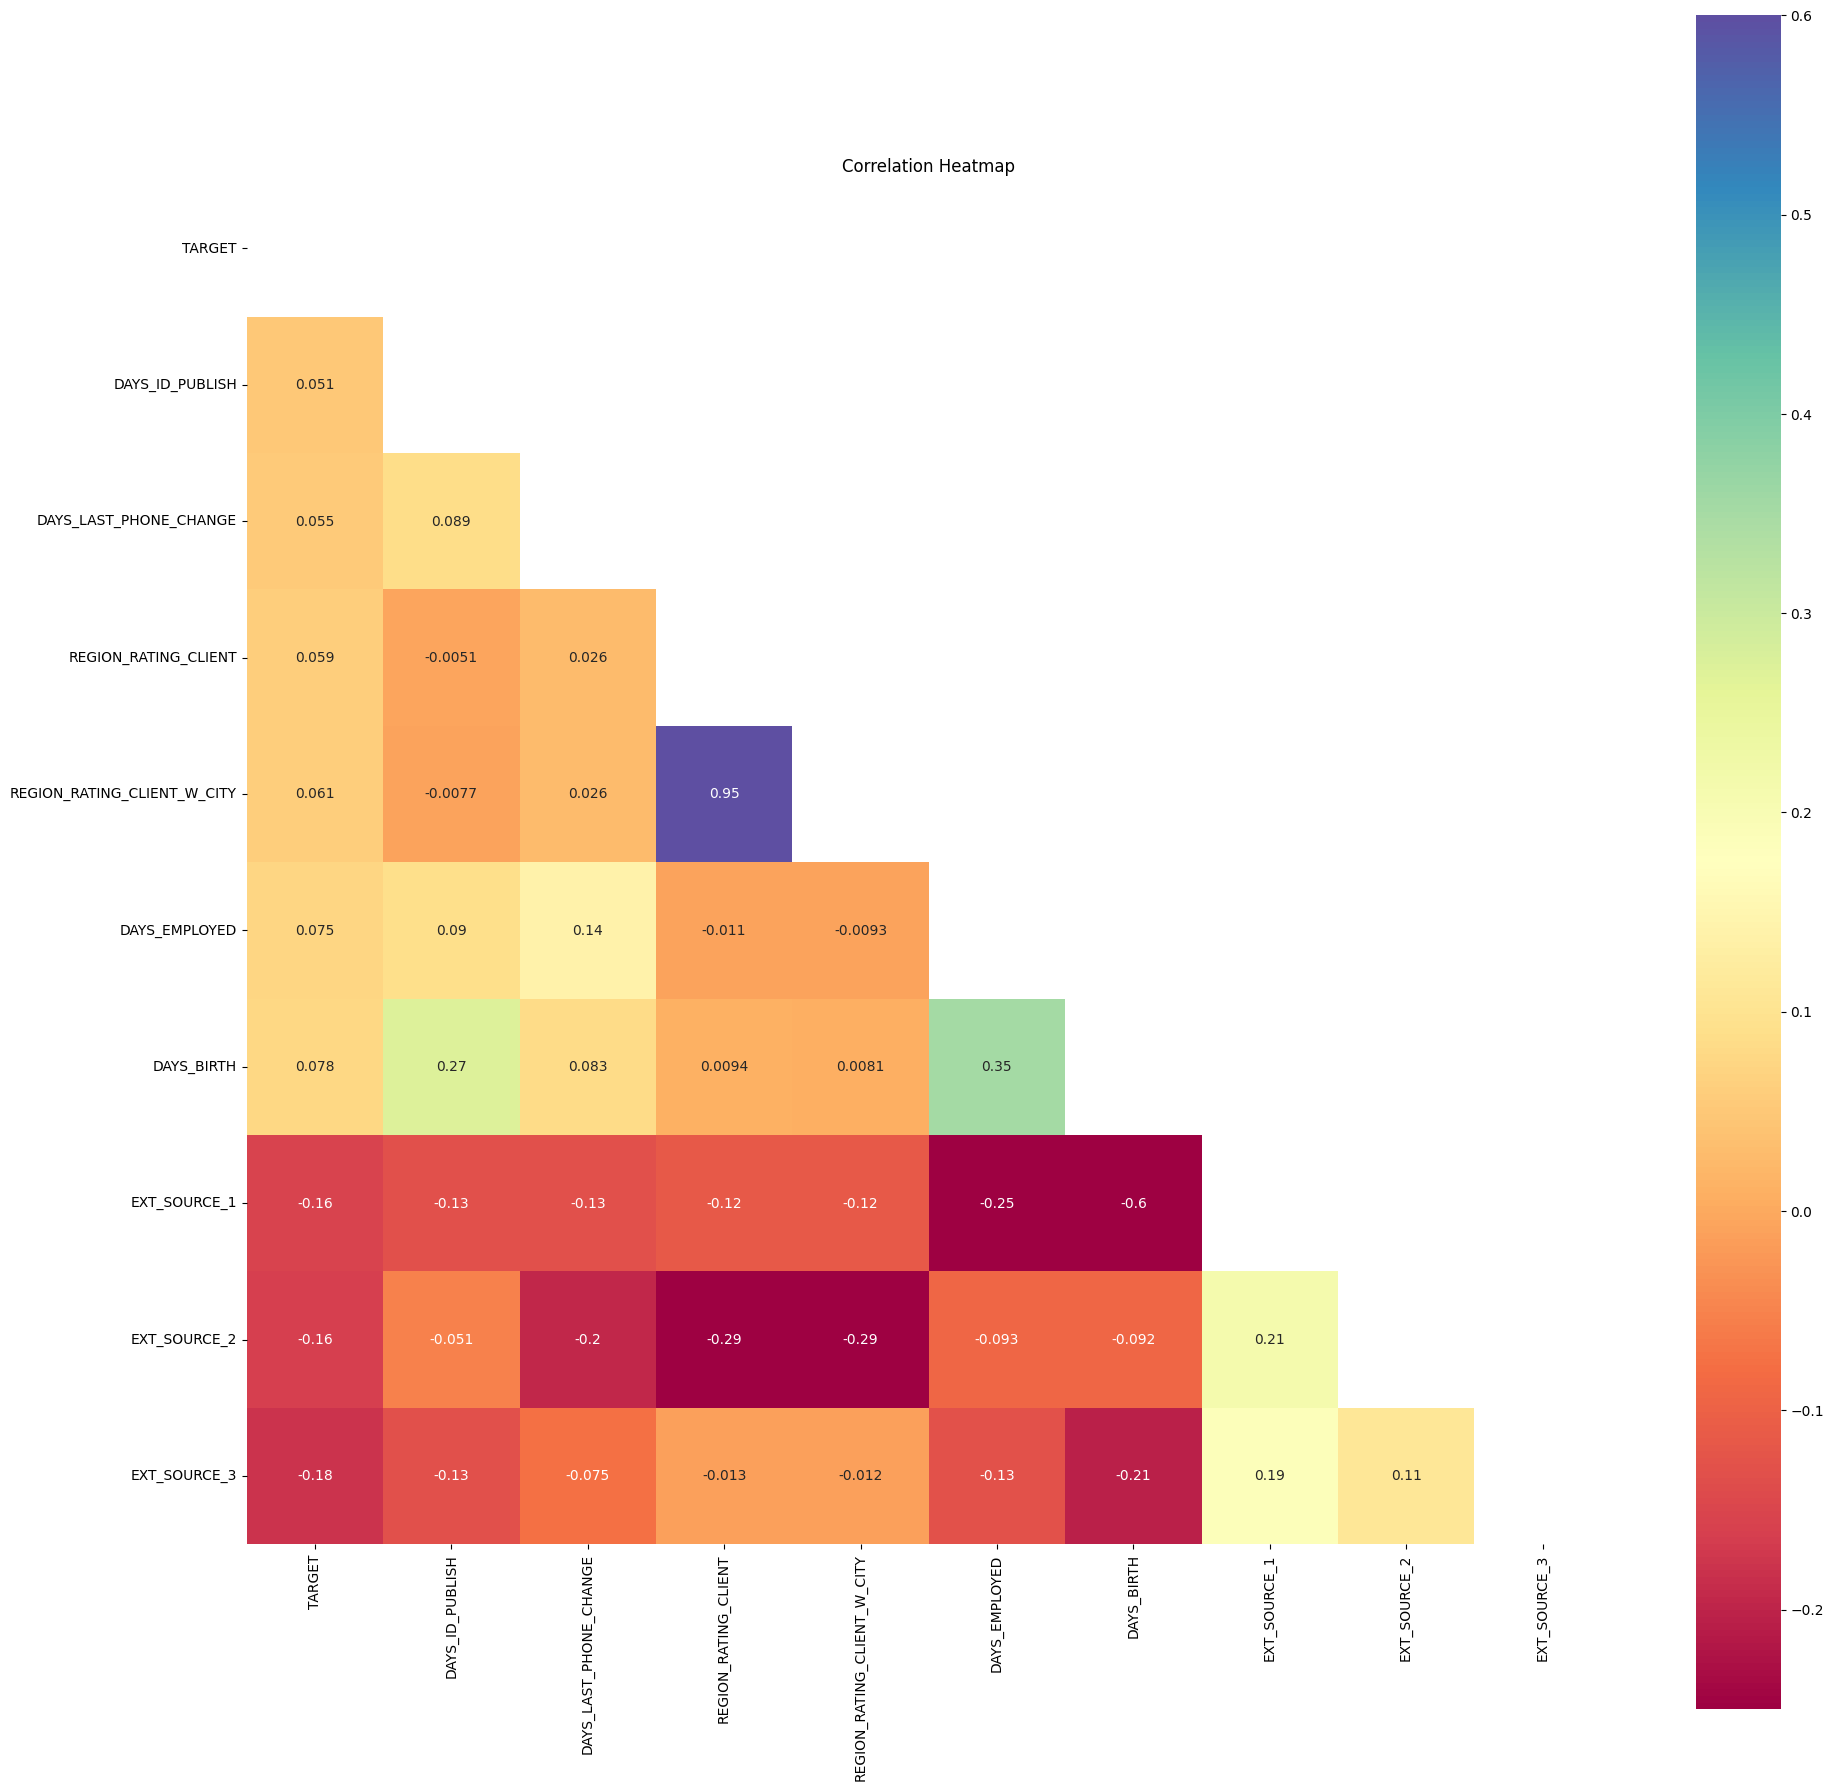

In [ ]:
ext_data = train[var_corr]

plt.figure(figsize = (22, 22))
mask = np.triu(np.ones_like(ext_data.corr()))

# Heatmap of correlations
sns.heatmap(ext_data.corr(),mask = mask, cmap = plt.cm.Spectral,square=True, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# Feature Engineering

In [ ]:
for element in list(train.loc[: ,train.dtypes == object].columns):
    print(element, '-----------------', train[element].unique())

NAME_CONTRACT_TYPE ----------------- ['CASH LOANS' 'REVOLVING LOANS']
CODE_GENDER ----------------- ['M' 'F']
FLAG_OWN_CAR ----------------- ['N' 'Y']
FLAG_OWN_REALTY ----------------- ['Y' 'N']
NAME_TYPE_SUITE ----------------- ['UNACCOMPANIED' 'FAMILY' 'SPOUSE, PARTNER' 'CHILDREN' 'OTHER_A' 'NAN'
 'OTHER_B' 'GROUP OF PEOPLE']
NAME_INCOME_TYPE ----------------- ['WORKING' 'STATE SERVANT' 'COMMERCIAL ASSOCIATE' 'PENSIONER' 'UNEMPLOYED'
 'STUDENT' 'BUSINESSMAN']
NAME_EDUCATION_TYPE ----------------- ['SECONDARY   SECONDARY SPECIAL' 'HIGHER EDUCATION' 'INCOMPLETE HIGHER'
 'LOWER SECONDARY' 'ACADEMIC DEGREE']
NAME_FAMILY_STATUS ----------------- ['SINGLE   NOT MARRIED' 'MARRIED' 'CIVIL MARRIAGE' 'WIDOW' 'SEPARATED']
NAME_HOUSING_TYPE ----------------- ['HOUSE   APARTMENT' 'RENTED APARTMENT' 'WITH PARENTS'
 'MUNICIPAL APARTMENT' 'OFFICE APARTMENT' 'COOP APARTMENT']
OCCUPATION_TYPE ----------------- ['LABORERS' 'CORE STAFF' 'ACCOUNTANTS' 'MANAGERS' 'NAN' 'DRIVERS'
 'SALES STAFF' 'CLEANING S

In [ ]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,CASH LOANS,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,CASH LOANS,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,REVOLVING LOANS,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,CASH LOANS,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,CASH LOANS,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Data Engineering
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


df_train = train.copy()
df_test = test.copy()

In [ ]:
#Récupération des identifiants clients et des labels
train_ids = df_train["SK_ID_CURR"]
test_ids = df_test["SK_ID_CURR"]


#df_train = df_train.set_index("SK_ID_CURR")
#df_test = df_test.set_index("SK_ID_CURR")


labels = df_train.TARGET

In [ ]:
def cat_encoder(features, test_features):
    '''
    Fonction qui fais un one hot encodage sur les variables
    catégorielles à l'aide de get_dummies.
    Elle fais un label encoder sur les variables binaires.
    Elle traite les valeurs manquantes comme des catégories.
    Elle retourne les datasets encodés.
    '''
    label_encoder = LabelEncoder()

    categorical_columns_train  = []
    categorical_columns_test  = []

    for col in features :
        if col != "TARGET":
            if features[col].dtype == object:
                #Label encodage pour les variables binaires
                if features[col].nunique()==2:
                    features[col] = label_encoder.fit_transform(features[col])
                #récupération des colonnes où on fera un one hot encodage
                elif features[col].nunique()>2:
                    categorical_columns_train.append(col)

    features = pd.get_dummies(features, columns = categorical_columns_train,dummy_na= True)

    for col in test_features :
        if test_features[col].dtype == object:
            #Label encodage pour les variables binaires
            if test_features[col].nunique()==2:
                test_features[col] = label_encoder.fit_transform(test_features[col])
            #récupération des colonnes où on fera un one hot encodage
            elif test_features[col].nunique()>2:
                categorical_columns_test.append(col)

    test_features = pd.get_dummies(test_features,columns = categorical_columns_test, dummy_na= True)

    #Alignement des dataframes
    features, test_features = features.align(test_features, join= 'inner', axis=1)

    return features, test_features

In [ ]:
def clean_data(train, test):

    # Valeurs abérantes
    #train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243
    #test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243

    #Création de feature
    df_train = train.copy()
    df_test = test.copy()

    #train data
    df_train['PROPORTION_LIFE_EMPLOYED'] = df_train['DAYS_EMPLOYED'] / df_train['DAYS_BIRTH']
    df_train['INCOME_TO_CREDIT_RATIO'] = df_train['AMT_INCOME_TOTAL'] / df_train['AMT_CREDIT']
    df_train['INCOME_TO_ANNUITY_RATIO'] = df_train['AMT_INCOME_TOTAL'] / df_train['AMT_ANNUITY']
    df_train['INCOME_TO_ANNUITY_RATIO_BY_AGE'] = df_train['INCOME_TO_ANNUITY_RATIO'] * df_train['DAYS_BIRTH']
    df_train['CREDIT_TO_ANNUITY_RATIO'] = df_train['AMT_CREDIT'] / df_train['AMT_ANNUITY']
    df_train['CREDIT_TO_ANNUITY_RATIO_BY_AGE'] = df_train['CREDIT_TO_ANNUITY_RATIO'] * df_train['DAYS_BIRTH']
    df_train['INCOME_TO_FAMILYSIZE_RATIO'] = df_train['AMT_INCOME_TOTAL'] / df_train['CNT_FAM_MEMBERS']
    df_train['ANNUITY_INCOME_PERC'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']

    #Test data
    df_test['PROPORTION_LIFE_EMPLOYED'] = df_test['DAYS_EMPLOYED'] / df_test['DAYS_BIRTH']
    df_test['INCOME_TO_CREDIT_RATIO'] = df_test['AMT_INCOME_TOTAL'] / df_test['AMT_CREDIT']
    df_test['INCOME_TO_ANNUITY_RATIO'] = df_test['AMT_INCOME_TOTAL'] / df_test['AMT_ANNUITY']
    df_test['INCOME_TO_ANNUITY_RATIO_BY_AGE'] = df_test['INCOME_TO_ANNUITY_RATIO'] * df_test['DAYS_BIRTH']
    df_test['CREDIT_TO_ANNUITY_RATIO'] = df_test['AMT_CREDIT'] / df_train['AMT_ANNUITY']
    df_test['CREDIT_TO_ANNUITY_RATIO_BY_AGE'] = df_test['CREDIT_TO_ANNUITY_RATIO'] * df_test['DAYS_BIRTH']
    df_test['INCOME_TO_FAMILYSIZE_RATIO'] = df_test['AMT_INCOME_TOTAL'] / df_test['CNT_FAM_MEMBERS']
    df_test['ANNUITY_INCOME_PERC'] = df_test['AMT_ANNUITY'] / df_test['AMT_INCOME_TOTAL']

    features=df_train.copy()
    test_features=df_test.copy()

    # Extraction des ID

    train_ids = features["SK_ID_CURR"]
    test_ids = test_features["SK_ID_CURR"]


    # Extraction des Targets
    labels = features['TARGET']

    #labels.reset_index(drop=True, inplace=True)

    # Suppression des ID and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])

    features, test_features = cat_encoder(features, test_features)


    # Extraction des noms des Feature
    feat_name = list(features.columns)

    #Imputation des Nan
    imputer = SimpleImputer(strategy = 'median')

    features = imputer.fit_transform(features)
    test_features = imputer.transform(test_features)

    # Scale les features
    scaler = MinMaxScaler(feature_range = (0, 1))

    features = scaler.fit_transform(features)
    test_features = scaler.transform(test_features)

    # Création des dataset
    features_set=pd.DataFrame(features,columns=feat_name)
    test_features_set=pd.DataFrame(test_features,columns=feat_name)

    #Ajout de la colonne TARGET et des ids
    features_set['TARGET']=labels
    features_set["SK_ID_CURR"] = train_ids
    test_features_set['SK_ID_CURR'] = test_ids

    #Passage des id en index
    features_set.set_index('SK_ID_CURR', inplace = True)
    test_features_set.set_index('SK_ID_CURR',inplace = True)

    print('Training Data Shape: ', features_set.shape)
    print('Testing Data Shape: ', test_features_set.shape)

    return features_set, test_features_set

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

features_set, test_features_set = clean_data(df_train,df_test)

Training Data Shape:  (307500, 261)
Testing Data Shape:  (48744, 260)


In [ ]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [ ]:
import gc

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(bureau, bb, nan_as_category = True):
    print("bureau :",bureau.shape)
    print("bureau_balance:",bb.shape)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg


In [ ]:
test_features_set

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_nan,WALLSMATERIAL_MODE_BLOCK,WALLSMATERIAL_MODE_MIXED,WALLSMATERIAL_MODE_MONOLITHIC,WALLSMATERIAL_MODE_NAN,WALLSMATERIAL_MODE_OTHERS,WALLSMATERIAL_MODE_PANEL,"WALLSMATERIAL_MODE_STONE, BRICK",WALLSMATERIAL_MODE_WOODEN,WALLSMATERIAL_MODE_nan
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.0,0.0,0.0,1.0,0.000000,0.000935,0.130787,0.073886,0.102132,0.257000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100005,0.0,1.0,0.0,1.0,0.000000,0.000627,0.044387,0.061443,0.034792,0.491595,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100013,0.0,1.0,1.0,1.0,0.000000,0.001512,0.154373,0.265830,0.147026,0.260475,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100028,0.0,0.0,0.0,1.0,0.105263,0.002474,0.382022,0.184872,0.382716,0.361433,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100038,0.0,1.0,1.0,0.0,0.052632,0.001320,0.144944,0.118761,0.145903,0.134897,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456221,0.0,0.0,0.0,1.0,0.000000,0.000819,0.091775,0.061846,0.057239,0.024260,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
456222,0.0,0.0,0.0,0.0,0.105263,0.001127,0.144173,0.118147,0.113356,0.491595,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
456223,0.0,0.0,1.0,1.0,0.052632,0.001512,0.067416,0.123201,0.068462,0.361433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
bureau_and_bb = bureau_and_balance(bureau, bureau_balance)
features_set = features_set.join(bureau_and_bb, how='left', on='SK_ID_CURR')
test_features_set = test_features_set.join(bureau_and_bb, how='left', on='SK_ID_CURR')
del bureau_and_bb
print(features_set.shape, test_features_set.shape)

bureau : (1716428, 17)
bureau_balance: (14104024, 3)
(307500, 377) (48744, 376)


In [ ]:
# Preprocess previous_applications.csv
def previous_applications(prev, nan_as_category = True):
    print("previous_application:",prev.shape)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    #prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev=prev[prev['DAYS_FIRST_DRAWING']!= 365243]
    #prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev=prev[prev['DAYS_FIRST_DUE']!= 365243]
    #prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev=prev[prev['DAYS_LAST_DUE_1ST_VERSION']!= 365243]
    #prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev=prev[prev['DAYS_LAST_DUE']!= 365243]
    #prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    prev=prev[prev['DAYS_TERMINATION']!= 365243]
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

In [ ]:
prev = previous_applications(previous_app)
features_set = features_set.join(prev, how='left', on='SK_ID_CURR')
test_features_set = test_features_set.join(prev, how='left', on='SK_ID_CURR')
del prev

previous_application: (798432, 37)


In [ ]:
# Preprocess POS_CASH_balance.csv
def pos_cash_fct(pos, nan_as_category = True):
    print("POS_CASH_balance:",pos.shape)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

In [ ]:
pos = pos_cash_fct(pos_cash)
features_set = features_set.join(pos, how='left', on='SK_ID_CURR')
test_features_set = test_features_set.join(pos, how='left', on='SK_ID_CURR')
del pos

POS_CASH_balance: (4937642, 8)


In [ ]:
# Preprocess installments_payments.csv
def installments_payments(ins, nan_as_category = True):
    print("installments_payments : ",ins.shape)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

In [ ]:
ins = installments_payments(installments)
features_set = features_set.join(ins, how='left', on='SK_ID_CURR')
test_features_set = test_features_set.join(ins, how='left', on='SK_ID_CURR')
del ins

installments_payments :  (3629937, 8)


In [ ]:
# Preprocess credit_card_balance.csv
def credit_card_balance(cc, nan_as_category = True):
    print("credit_card_balance:",cc.shape)
    print("")
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

In [ ]:
cc = credit_card_balance(credit_card)
features_set = features_set.join(cc, how='left', on='SK_ID_CURR')
test_features_set = test_features_set.join(cc, how='left', on='SK_ID_CURR')
del cc

credit_card_balance: (1759692, 23)



In [ ]:
(features_set.isna().sum().sum() / (features_set.shape[0] * features_set.shape[1])) * 100

41.32245530465193

In [ ]:
def missing_values_imputation(df):
    for v in df.columns:
        #if (df[v].dtypes == 'float64' or df[v].dtypes == 'int64'):
        median=df[v].median()
        #df[v].fillna(median, inplace=True)
        df.loc[df[v].isna(), v] = median
    print("Done : 100% \n")

In [ ]:
def scaling_df(train, test):
    features=train.copy()
    test_features=test.copy()

    features.reset_index(inplace=True)
    test_features.reset_index(inplace=True)

    # Extraction des ID
    train_ids = features["SK_ID_CURR"]
    test_ids = test_features["SK_ID_CURR"]


    # Extraction des Targets
    labels = features['TARGET']

    #labels.reset_index(drop=True, inplace=True)

    # Suppression des ID and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])

    features, test_features = cat_encoder(features, test_features)


    # Extraction des noms des Feature
    feat_name = list(features.columns)



    # Scale les features
    scaler = MinMaxScaler(feature_range = (0, 1))

    features = scaler.fit_transform(features)
    test_features = scaler.transform(test_features)

    # Création des dataset
    features_set=pd.DataFrame(features,columns=feat_name)
    test_features_set=pd.DataFrame(test_features,columns=feat_name)

    #Ajout de la colonne TARGET et des ids
    features_set['TARGET']=labels
    features_set["SK_ID_CURR"] = train_ids
    test_features_set['SK_ID_CURR'] = test_ids

    #Passage des id en index
    features_set.set_index('SK_ID_CURR', inplace = True)
    test_features_set.set_index('SK_ID_CURR',inplace = True)

    return features_set, test_features_set

In [ ]:
# replace infinity values by "nan"
features_set.replace([np.inf, -np.inf], np.nan, inplace=True)
test_features_set.replace([np.inf, -np.inf], np.nan, inplace=True)

print("removing empty columns > 50% :")
print("=============================")
# removing empty columns > 50%
features_set = features_set.loc[:, features_set.isnull().mean() <.50]
test_features_set = test_features_set.loc[:, test_features_set.isnull().mean() <.50]
print("Done : 100%")

print("Missing values imputation processing :")
print("=====================================")
missing_values_imputation(features_set)
missing_values_imputation(test_features_set)

print("Scaling values processing :")
print("=====================================")
features_set, test_features_set = scaling_df(features_set, test_features_set)
print("Done : 100%")

removing empty columns > 50% :
Done : 100%
Missing values imputation processing :
Done : 100% 

Done : 100% 

Scaling values processing :
Done : 100%


In [ ]:
print((features_set.isna().sum().sum() / (features_set.shape[0] * features_set.shape[1])) * 100)
print((test_features_set.isna().sum().sum() / (test_features_set.shape[0] * test_features_set.shape[1])) * 100)

0.0
0.0


In [ ]:
test_features_set

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,POS_NAME_CONTRACT_STATUS_Active_MEAN,POS_NAME_CONTRACT_STATUS_Approved_MEAN,POS_NAME_CONTRACT_STATUS_Canceled_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Demand_MEAN,POS_NAME_CONTRACT_STATUS_Returned to the store_MEAN,POS_NAME_CONTRACT_STATUS_Signed_MEAN,POS_NAME_CONTRACT_STATUS_XNA_MEAN,POS_NAME_CONTRACT_STATUS_nan_MEAN,POS_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.0,0.0,0.0,1.0,0.000000,0.000935,0.130787,0.073886,0.102132,0.257000,...,0.600000,0.0,0.0,0.400000,0.0,0.0,0.00,0.0,0.0,0.029412
100005,0.0,1.0,0.0,1.0,0.000000,0.000627,0.044387,0.061443,0.034792,0.491595,...,0.800000,0.0,0.0,0.000000,0.0,0.0,0.20,0.0,0.0,0.029412
100013,0.0,1.0,1.0,1.0,0.000000,0.001512,0.154373,0.265830,0.147026,0.260475,...,0.880000,0.0,0.0,0.080000,0.0,0.0,0.04,0.0,0.0,0.176471
100028,0.0,0.0,0.0,1.0,0.105263,0.002474,0.382022,0.184872,0.382716,0.361433,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.102941
100038,0.0,1.0,1.0,0.0,0.052632,0.001320,0.144944,0.118761,0.145903,0.134897,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.029412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456221,0.0,0.0,0.0,1.0,0.000000,0.000819,0.091775,0.061846,0.057239,0.024260,...,0.750000,0.0,0.0,0.250000,0.0,0.0,0.00,0.0,0.0,0.022059
456222,0.0,0.0,0.0,0.0,0.105263,0.001127,0.144173,0.118147,0.113356,0.491595,...,0.975610,0.0,0.0,0.024390,0.0,0.0,0.00,0.0,0.0,0.294118
456223,0.0,0.0,1.0,1.0,0.052632,0.001512,0.067416,0.123201,0.068462,0.361433,...,0.956522,0.0,0.0,0.043478,0.0,0.0,0.00,0.0,0.0,0.161765


In [ ]:
import re

#Normalisation des noms des features
features_set = features_set.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_features_set = test_features_set.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
#On remet les identifiants dans le dataframe
test_features = test_features_set.reset_index()

In [ ]:
def echantillonage(df_X, df_y):
    X = df_X.copy()
    y = df_y.copy()

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

    return X_train, X_valid, y_train, y_valid

In [ ]:
from sklearn.model_selection import train_test_split

#Echantillonage du set d'entrainement
seed = 42
df_X = features_set.drop(columns = 'TARGET')
df_y = features_set['TARGET']
train_set, val_set, train_labels, val_labels = echantillonage(df_X,df_y)

In [ ]:
#On remets les labels dans train_set/val_set
train_set['TARGET']=train_labels
val_set['TARGET']=val_labels

In [ ]:
#On remets les identifiants
train_set = train_set.reset_index()

In [ ]:
print(train_set.shape, train.shape)

(246000, 368) (307500, 122)


## Création d'échantillon pour la sélection du meilleur modèle

In [ ]:
#Echantillonnage de X
sample_X = features_set.drop(columns = 'TARGET').sample(n= 50000)

#Echantillonnage de y
sample_y = features_set['TARGET'][sample_X.index]

#Création d'un train / validation set & d'un train / validation labels
train_sample_set, val_sample_set, train_sample_labels, val_sample_labels = echantillonage(sample_X,sample_y)

In [ ]:
#Ajout des targets aux train / validation set
train_sample_set['TARGET']=train_sample_labels
val_sample_set['TARGET']=val_sample_labels

#Remise des ID en colonne
train_sample_set = train_sample_set.reset_index()

In [ ]:
print('train shape :',train_set.shape)
print('validation shape :',val_set.shape)


print('train sample shape :',train_sample_set.shape)
print('validation sample shape :',val_sample_set.shape)

train shape : (246000, 368)
validation shape : (61500, 367)
train sample shape : (40000, 368)
validation sample shape : (10000, 367)


In [ ]:
import pickle
#sauvegarde des train set et val set sous forme binaire dans train_set.p et val_set.p
pickle.dump( train_set, open( "train_set.p", "wb" ) )
pickle.dump( val_set, open( "val_set.p", "wb" ) )

In [ ]:
#chargement des train set et val set à partir des données binarisées train_set.p et val_set.p
train_set = pickle.load( open( "train_set.p", "rb" ) )
val_set = pickle.load( open( "val_set.p", "rb" ) )

In [ ]:
test_export = test_features_set.sample(1200, random_state=42)

In [ ]:
import pickle
#sauvegarde de test
pickle.dump(test_export, open("test_set", "wb"))

# Sélection du meilleur modèle

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Dictionnaire de classifieurs
classifieurs = {
    'Dummy Classifier': DummyClassifier(),
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'LGBM': lgb.LGBMClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    #'Support Vector Classifier': SVC(kernel='rbf', C=1.0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

In [ ]:
def plot_roc_curve(classifiers, X, y, n_splits=5):

    kf = KFold(n_splits=n_splits)
    for name_clf, clf in classifiers.items():
        print(name_clf)
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        for i, (train, test) in enumerate(kf.split(X, y)):

            clf.fit(X.iloc[train, :], y.iloc[train])

            y_pred_grd = clf.predict_proba(X.iloc[test, :])[:, 1]
            fpr, tpr, thresholds = roc_curve(y.iloc[test], y_pred_grd)

            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            thresholds = auc(fpr, tpr)

            aucs.append(thresholds)

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        plt.plot(mean_fpr, mean_tpr,
            label=name_clf + r'(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2,
            alpha=.8)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()



Dummy Classifier
Logistic Regression
LGBM
[LightGBM] [Info] Number of positive: 2584, number of negative: 29416
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28906
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 317
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080750 -> initscore=-2.432200
[LightGBM] [Info] Start training from score -2.432200
[LightGBM] [Info] Number of positive: 2620, number of negative: 29380
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28915
[LightGBM] [Info] Number of data points in the train set: 3200

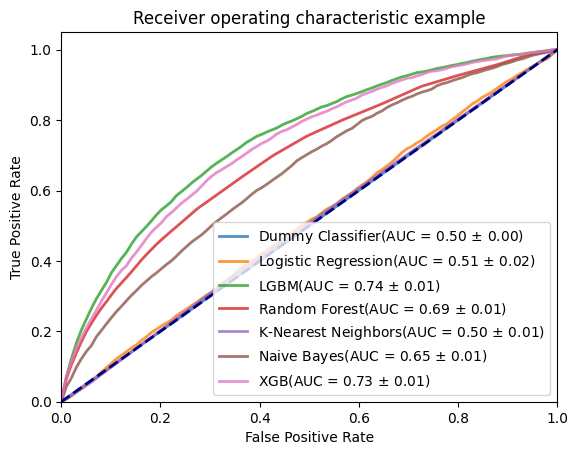

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

X = train_sample_set.drop(columns = 'TARGET')
y = train_sample_labels

plot_roc_curve(classifieurs, X, y, n_splits = 5)

Retirer les caractères # ci-dessous afin de pouvoir pleinement profiter du tracking.

In [ ]:
#import mlflow

#mlflow.set_experiment("Model_Selection")
#mlflow.sklearn.autolog()
#for model_name, model in classifieurs.items():
#  if model_name in ['Dummy Classifier', 'Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes']:
#    with mlflow.start_run(run_name = type(model).__name__):
#      model.fit(X,y)

#mlflow.lightgbm.autolog()
#model = lgb.LGBMClassifier()
#with mlflow.start_run(run_name = type(model).__name__):
#  model.fit(X,y)

#mlflow.xgboost.autolog()
#model = XGBClassifier()
#with mlflow.start_run(run_name = type(model).__name__):
#  model.fit(X,y)


In [ ]:
train["TARGET"].value_counts()

0    282677
1     24823
Name: TARGET, dtype: int64

In [ ]:
type(DummyClassifier()).__name__

'DummyClassifier'

# Equilibrage du modèle

In [ ]:
def optimisation_model(set_data, predictor, metric, n_folds = 5, smote=False, under=False, n_ite_baye = 10):
    data = set_data.copy()

  # Extraction des ID
    train_ids = data['SK_ID_CURR']

  #Extraction des targets
    targets = data['TARGET']

  # Remove the ids and target
    data = data.drop(columns = ['SK_ID_CURR', 'TARGET'])

  ### Fonction de cross validation
    def CV_kfol(X,Y,model_classific,metric,seuil_p,n_folds = 5,smote=False,under=False):

        features = X.copy()
        labels = Y.copy()

        #Extraction des feature names
        feature_names = list(features.columns)

        #Convertion en np arrays
        features = np.array(features)

        #Creation du kfold
        k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = seed)

        #Vecteur vide pour feature importances
        feature_importance_values = np.zeros(len(feature_names))

        #Vecteur vide pour prediction sur validation
        prediction = np.zeros(features.shape[0])

        #Liste pour stocker les validation et training scores
        valid_scores = []

        #Boucle pour chaque fold
        n_boucl=0
        for train_indices, valid_indices in k_fold.split(features):
            n_boucl +=1
            model = model_classific

            #Training data
            train_features, train_labels = features[train_indices], labels[train_indices]

            #rééquilibrage
            if smote == True :

                sm = SMOTE(random_state=seed)
                train_features, train_labels = sm.fit_resample(train_features, train_labels)

            elif under == True :

                us = RandomUnderSampler(sampling_strategy='majority', random_state=seed)
                train_features, train_labels = us.fit_resample(train_features, train_labels)

            #Validation data
            valid_features, valid_labels = features[valid_indices], labels[valid_indices]

            #Train du model
            model.fit(train_features, train_labels)

            #Récupération du best_iteration
            best_iteration = model.best_iteration_

            #Récupération des feature importances
            feature_importance_values += model.feature_importances_ / k_fold.n_splits

            #Récupération des predictions des validations
            prediction[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]

            y_pred = (prediction[valid_indices] > seuil_p)
            y_pred = np.array(y_pred > 0) * 1

            #Evaluation du model avec la metric
            valid_score = metric(labels[valid_indices],y_pred,seuil_p)
            #print('score de la boucle CV =',valid_score)

            #Récupération des best score
            valid_scores.append(valid_score)

            #Clean mémoire
            gc.enable()
            del model, train_features, valid_features
            gc.collect()

        return valid_scores#, feature_names, feature_importance_values


    ### Fonction a optimiser
    def optimize_rf(params,
                  model_optim=predictor,
                  X=data,
                  Y=targets,
                  metric=metric,
                  n_folds=n_folds,
                  smote=smote,
                  under=under
                  ):
        params_model = {'n_estimators': int(params['n_estimators']),
                    'max_depth': int(params['max_depth']),
                    'learning_rate': params['learning_rate'],
                    'subsample': params['subsample'],
                    'colsample_bytree': params['colsample_bytree'],
                    'num_leaves': int(params['num_leaves']),
                    'reg_alpha': params['reg_alpha'],
                    'reg_lambda': params['reg_lambda']
                       }

        model_optim.set_params(**params_model, class_weight = 'balanced')
        seuil_p = params['seuil']

        #Cross validation
        valid_score= CV_kfol(X,
                             Y,
                             model_optim,
                             metric,
                             seuil_p,
                             n_folds = n_folds,
                             smote = smote,
                             under = under
                            )

        #Moyenne des score de validation
        valid_loss_moy= 1-np.mean(valid_score)

        return valid_loss_moy


    #espace des parameters
    space={'n_estimators': hp.quniform('n_estimators', 200, 2000, 200),
          'max_depth' : hp.quniform('max_depth', 2, 30, 2),
          'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
          'subsample': hp.quniform('subsample', 0.1, 1.0, 0.2),
          'colsample_bytree': hp.quniform('colsample_by_tree', 0.6, 1.0, 0.1),
          'num_leaves': hp.quniform('num_leaves', 4, 100, 4),
          'reg_alpha': hp.quniform('reg_alpha', 0.1, 1.0, 0.1),
          'reg_lambda': hp.quniform('reg_lambda', 0.1, 1.0, 0.1),
          'seuil': hp.quniform('seuil', 0.0, 1.0, 0.025)
            }

    #Optimisation
    optim=fmin(fn=optimize_rf,
                space=space,
                algo=tpe.suggest, # selection des paramètre automatiquement
                max_evals=n_ite_baye, # nb iterations
      )

    #configuration du modèle avec les paramètres optimisés
    predictor.set_params(
                  n_estimators=int(optim['n_estimators']),
                  max_depth=int(optim['max_depth']),
                  learning_rate=optim['learning_rate'],
                  subsample=optim['subsample'],
                  colsample_bytree=optim['colsample_by_tree'],
                  num_leaves=int(optim['num_leaves']),
                  reg_alpha=optim['reg_alpha'],
                  reg_lambda=optim['reg_lambda']
                    )

    #Entrainement du modèle sur tout le jeux de données
    predictor.fit(data, targets)

    #Récupération des best parameters
    best_parameters = optim

    #Récupération des feature importances
    feature_importance_values = predictor.feature_importances_

    return best_parameters, feature_importance_values, predictor

In [ ]:
def cout_metier(y_true, y_pred, seuil=0.5, fn_value=-1, fp_value=-0.1, vp_value=0, vn_value=0):

    '''
    Métrique métier tentant de minimiser le risque d'accord prêt pour la
    banque en pénalisant les faux négatifs.
    '''

    # Liste des prédiction selon un seuil de probabilité
    y_seuil=[]

    for i in y_pred:
        if i >= seuil:
            y_seuil.append(1)
        elif i < seuil:
            y_seuil.append(0)

    #Matrice de Confusion
    mat_conf = confusion_matrix(y_true, y_pred)

    # Nombre de True Negatifs
    vn = mat_conf[0, 0]
    # Nombre de Faux Négatifs
    fn = mat_conf[1, 0]
    # Nombre de Faux Positifs
    fp = mat_conf[0, 1]
    # Nombre de True Positifs
    vp = mat_conf[1, 1]

    # Gain total
    J = vp*vp_value + vn*vn_value + fp*fp_value + fn*fn_value

    # Gain maximum
    max_J = (fp + vn)*vn_value + (fn + vp)*vp_value

    # Gain minimum
    min_J = (fp + vn)*fp_value + (fn + vp)*fn_value

    # Gain normalisé entre 0 et 1
    J_normalized = (J - min_J)/(max_J - min_J)

    return J_normalized  # Retourne la fonction d'évaluation

In [ ]:
from hyperopt import hp
from hyperopt import tpe
from hyperopt import fmin
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import gc

best_par_0, feat_imp_0, model_0 = optimisation_model(train_sample_set, lgb.LGBMClassifier(),metric = cout_metier, n_ite_baye=5)

[LightGBM] [Info] Number of positive: 2623, number of negative: 29377
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28647
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 316
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 2598, number of negative: 29402
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.120978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28650
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 315
[LightGBM]

In [ ]:
best_par_0

{'colsample_by_tree': 0.6000000000000001,
 'learning_rate': 0.007714014034416742,
 'max_depth': 10.0,
 'n_estimators': 400.0,
 'num_leaves': 84.0,
 'reg_alpha': 0.6000000000000001,
 'reg_lambda': 1.0,
 'seuil': 0.5750000000000001,
 'subsample': 0.8}

In [ ]:
def gain_seuil(clf, y_set, x_set):

    """
    Evolution du gain en fonction du seuil de solvabilité fixé
    Si score < seuil : client solvable
    Sinon : client non solvable

    """
    cost_function = []
    threshold_x = np.linspace(0.0, 1, 30)

    for threshold in threshold_x:

        # Score du modèle : 0 à 1
        y_scores = clf.predict_proba(x_set)[:, 1]

        # Score > seuil de solvabilité : retourne 1 sinon 0
        y_pred = (y_scores > threshold)

        y_pred = np.array(y_pred > 0) * 1
        # Calcul de l'indice bancaire
        cost_function.append(cout_metier(y_set, y_pred))

    # Affichage du gain en fonction du seuil de solvabilité
    plt.plot(threshold_x, cost_function)
    plt.xlabel("Seuil de probabilité")
    plt.ylabel("Indice banquaire")
    plt.xticks(np.linspace(0.1, 1, 10))

In [ ]:
from sklearn.metrics import roc_auc_score

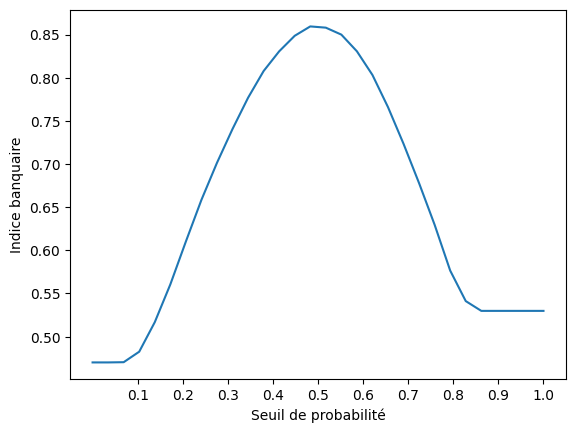

In [ ]:
gain_seuil(model_0, train_sample_labels, train_sample_set.drop(columns = ['TARGET','SK_ID_CURR']))

In [ ]:

y_proba = model_0.predict_proba(val_sample_set.drop(columns = ['TARGET']))[:, 1]
y_pred_proba = y_proba > best_par_0['seuil']
y_pred_proba = np.array(y_pred_proba > 0)*1

# Si proba > seuil alors la prédiction est positive : 1
score= roc_auc_score(val_sample_labels,y_pred_proba)

print ("ROC auc score : ",score)
print("métrique métier : ",cout_metier(val_sample_labels,y_pred_proba))

ROC auc score :  0.6606780272519801
métrique métier :  0.6709172003659652


In [ ]:
def afficher_matrice_confusion(y_true, y_pred, title):

    plt.figure(figsize=(6, 4))

    cm = confusion_matrix(y_true, y_pred)

    #labels = ['Non défaillants', 'Défaillants']

    group_names = ['Vrai Neg','Faux Pos','Faux Neg','Vrai Pos']

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm,
                #xticklabels=labels,
                #yticklabels=labels,
                annot=labels,
                fmt='',
                cmap=plt.cm.Blues)
    plt.title(f'Matrice de confusion de : {title}')
    plt.ylabel('Classe réelle')
    plt.xlabel('Classe prédite')
    plt.show()

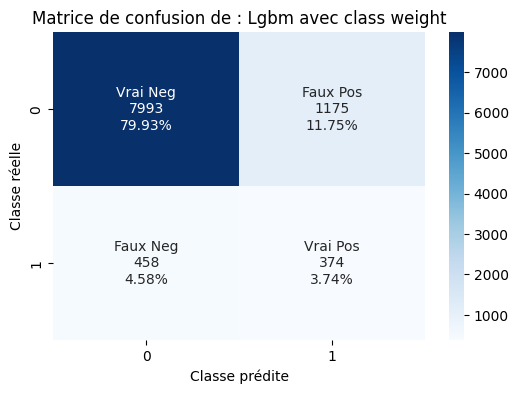

In [ ]:
afficher_matrice_confusion(val_sample_labels,y_pred_proba, "Lgbm avec class weight")

## Smote

In [ ]:
from imblearn.over_sampling import SMOTE
#Smote ou oversampling
best_par_smote, feat_imp_smote, model_smote = optimisation_model(train_sample_set, lgb.LGBMClassifier(),metric = cout_metier,smote = True, n_ite_baye=5)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive g

In [ ]:
#model = lgb.LGBMClassifier()
#model.fit(train_sample_set, train_sample_labels)

#y_proba = model.predict_proba(val_sample_set.drop(columns = ['TARGET']))[:, 1]
#y_pred_proba = y_proba > 0.5
#y_pred_proba = np.array(y_pred_proba_smote > 0)*1

#print("métrique métier : ",cout_metier(val_sample_labels,y_pred_proba_smote))

In [ ]:
best_par_smote

{'colsample_by_tree': 0.7000000000000001,
 'learning_rate': 0.049375191480331905,
 'max_depth': 14.0,
 'n_estimators': 1600.0,
 'num_leaves': 80.0,
 'reg_alpha': 0.9,
 'reg_lambda': 0.30000000000000004,
 'seuil': 0.15000000000000002,
 'subsample': 0.8}

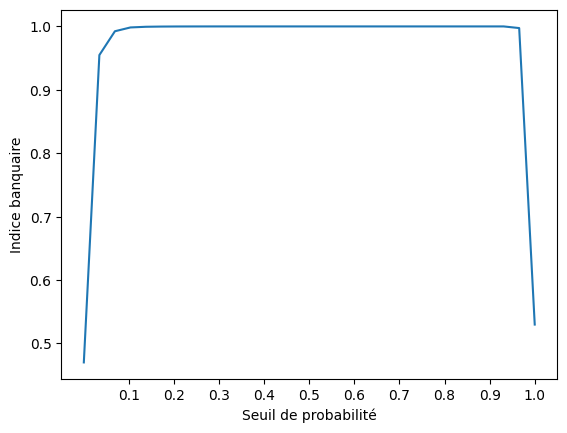

In [ ]:
gain_seuil(model_smote, train_sample_labels, train_sample_set.drop(columns = ["SK_ID_CURR",'TARGET']))

In [ ]:
y_proba_smote = model_smote.predict_proba(val_sample_set.drop(columns = ['TARGET']))[:, 1]
y_pred_proba_smote = y_proba_smote > best_par_smote['seuil']
y_pred_proba_smote = np.array(y_pred_proba_smote > 0)*1

# Si proba > seuil alors la prédiction est positive : 1
score_smote= roc_auc_score(val_sample_labels,y_pred_proba_smote)

print ("ROC auc score : ",score_smote)
print("métrique métier : ",cout_metier(val_sample_labels,y_pred_proba_smote))

ROC auc score :  0.6232117985635655
métrique métier :  0.6376372369624885


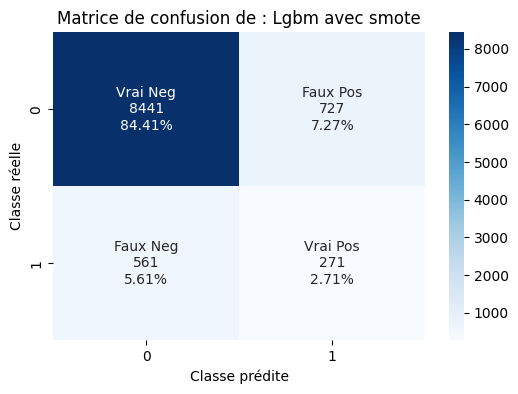

In [ ]:
afficher_matrice_confusion(val_sample_labels,y_pred_proba_smote, "Lgbm avec smote")

## Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

best_parameters_us, feature_importance_us, model_us = optimisation_model(train_sample_set, lgb.LGBMClassifier(),
                                                                             metric=cout_metier, under=True,
                                                                             n_ite_baye=5
                                                                             )

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there ar

In [ ]:
best_parameters_us

{'colsample_by_tree': 0.8,
 'learning_rate': 0.036920171335245944,
 'max_depth': 4.0,
 'n_estimators': 600.0,
 'num_leaves': 52.0,
 'reg_alpha': 0.9,
 'reg_lambda': 0.30000000000000004,
 'seuil': 0.6000000000000001,
 'subsample': 0.4}

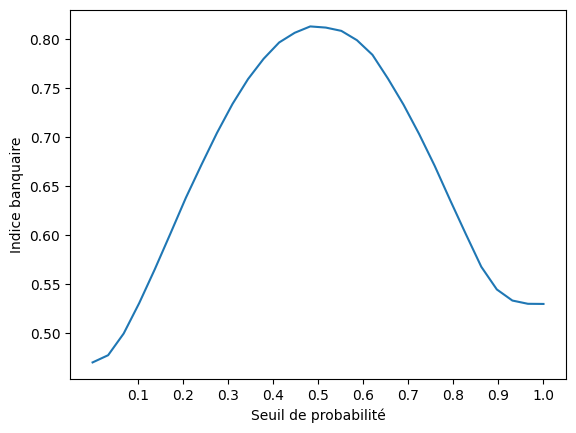

In [ ]:
gain_seuil(model_us, train_sample_labels, train_sample_set.drop(columns = ["SK_ID_CURR",'TARGET']))

In [ ]:
y_proba_us = model_us.predict_proba(val_sample_set.drop(columns = ['TARGET']))[:, 1]
y_pred_proba_us = y_proba_us > best_parameters_us['seuil']
y_pred_proba_us = np.array(y_pred_proba_us > 0)*1

# Si proba > seuil alors la prédiction est positive : 1
score_us= roc_auc_score(val_sample_labels,y_pred_proba_us)

print ("ROC auc score : ",score_us)
print("métrique métier : ",cout_metier(val_sample_labels,y_pred_proba_us))

ROC auc score :  0.6649382467445295
métrique métier :  0.6750343092406222


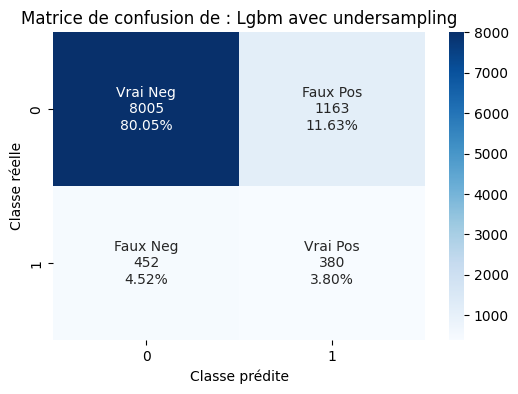

In [ ]:
afficher_matrice_confusion(val_sample_labels,y_pred_proba_us, "Lgbm avec undersampling")

In [ ]:
def score_validation_set(model):
    '''
    Fonction de prédiction sur le set de validation
    '''
    name=[]
    score=[]
    target_0=[]
    target_1=[]
    seuil=0.52
    for i,j in model.items():
        y_test_proba=j.predict_proba(val_set.drop(['TARGET'],axis=1))[:, 1]
        name.append(i)
        y_pred = j.predict(val_set.drop(['TARGET'],axis=1))
        score.append(cout_metier(val_set['TARGET'],y_pred))


        y_seuil_test=[]
        for i in y_test_proba:
            if i >= seuil:
                y_seuil_test.append(1)
            elif i < seuil:
                y_seuil_test.append(0)

        pred_frame=pd.DataFrame(y_seuil_test)
    #display(pred_frame)
        target_0.append((pred_frame.value_counts()/len(pred_frame)*100)[0].item())
        target_1.append((pred_frame.value_counts()/len(pred_frame)*100)[1].item())


    return name,score,target_0, target_1

In [ ]:
#Dictionnaire de modèles
dict_model={'class_weight':model_0,
            'Over_sampling':model_smote,
            'Under_sampling':model_us
           }

In [ ]:
name,score, target_0, target_1=score_validation_set(dict_model)

val_list={'Sampling':'True_val',
          'Pred_0':(val_sample_set['TARGET'].value_counts()/len(val_sample_set)*100)[0].item(),
          'Pred_1':(val_sample_set['TARGET'].value_counts()/len(val_sample_set)*100)[1].item()}

df_score=pd.DataFrame()
df_score['Sampling']=name
df_score['metrique metier']=score
df_score['Pred_0']=target_0
df_score['Pred_1']=target_1
df_score

,Sampling,metrique metier,Pred_0,Pred_1
0,class_weight,0.703606,78.744715,21.255285
1,Over_sampling,0.616746,97.575610,2.424390
2,Under_sampling,0.701639,76.513821,23.486179


In [ ]:
val_set.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,POS_NAME_CONTRACT_STATUS_Approved_MEAN,POS_NAME_CONTRACT_STATUS_Canceled_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Demand_MEAN,POS_NAME_CONTRACT_STATUS_Returnedtothestore_MEAN,POS_NAME_CONTRACT_STATUS_Signed_MEAN,POS_NAME_CONTRACT_STATUS_XNA_MEAN,POS_NAME_CONTRACT_STATUS_nan_MEAN,POS_COUNT,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
258674,0.0,0.0,0.0,0.0,0.105263,0.001512,0.102247,0.050878,0.103255,0.282797,...,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.014706,0
323520,0.0,0.0,0.0,1.0,0.000000,0.001473,0.314607,0.209337,0.315376,0.038481,...,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.058824,0
267196,0.0,0.0,0.0,1.0,0.000000,0.001512,0.098876,0.039066,0.099888,1.000000,...,0.0,0.0,0.036364,0.0,0.0,0.000,0.0,0.0,0.073529,0
411246,0.0,0.0,1.0,0.0,0.052632,0.000550,0.179775,0.099403,0.180696,0.197042,...,0.0,0.0,0.125000,0.0,0.0,0.125,0.0,0.0,0.051471,0
278842,0.0,0.0,0.0,0.0,0.105263,0.000935,0.118921,0.105511,0.102132,0.196267,...,0.0,0.0,0.045455,0.0,0.0,0.000,0.0,0.0,0.154412,0


In [ ]:
train_sample_set.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,POS_NAME_CONTRACT_STATUS_Approved_MEAN,POS_NAME_CONTRACT_STATUS_Canceled_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Demand_MEAN,POS_NAME_CONTRACT_STATUS_Returnedtothestore_MEAN,POS_NAME_CONTRACT_STATUS_Signed_MEAN,POS_NAME_CONTRACT_STATUS_XNA_MEAN,POS_NAME_CONTRACT_STATUS_nan_MEAN,POS_COUNT,TARGET
0,187323,0.0,1.0,0.0,0.0,0.000000,0.001704,0.213483,0.096332,0.214366,...,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.117647,0
1,356859,0.0,0.0,0.0,1.0,0.000000,0.001704,0.055056,0.066269,0.056117,...,0.0,0.0,0.102564,0.0,0.0,0.0,0.0,0.0,0.279412,0
2,175838,0.0,0.0,0.0,1.0,0.000000,0.000742,0.052384,0.072710,0.038159,...,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.117647,0
3,252294,0.0,1.0,1.0,0.0,0.052632,0.001512,0.224326,0.099140,0.186308,...,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.014706,0
4,120548,0.0,0.0,0.0,0.0,0.000000,0.000935,0.018018,0.038715,0.015713,...,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.154412,0


In [ ]:
# Sauvegarde du meilleur modèle dans best_model
fichier_best_model = 'best_model.pickle'
with open(fichier_best_model, 'wb') as fichier:
    pickle.dump(model_smote, fichier, pickle.HIGHEST_PROTOCOL)

In [ ]:
y_test_pred_proba=model_smote.predict_proba(test_features_set)[:, 1]

seuil=best_par_smote['seuil']
y_seuil_test = y_test_pred_proba > seuil
y_seuil_test = np.array(y_seuil_test> 0)*1


df_test_pred=df_test.copy()
df_test_pred['Proba']=y_test_pred_proba
df_test_pred['PREDICTION']=y_seuil_test
df_test_pred.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Proba,PREDICTION
0,100001,CASH LOANS,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.023632,0
1,100005,CASH LOANS,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.091035,0
2,100013,CASH LOANS,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,4.0,0.003096,0
3,100028,CASH LOANS,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.001753,0
4,100038,CASH LOANS,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.020379,0


In [ ]:
df_test_pred[df_test_pred.PREDICTION == 1]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Proba,PREDICTION
15,100107,CASH LOANS,M,Y,Y,0,180000.0,296280.0,21690.0,225000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0.231952,1
37,100278,CASH LOANS,F,N,Y,1,121500.0,450000.0,35685.0,450000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.400103,1
39,100306,CASH LOANS,M,N,N,0,112500.0,360000.0,28570.5,360000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.284786,1
74,100568,CASH LOANS,M,N,N,0,112500.0,312768.0,24709.5,270000.0,...,0,0,0.0,0.0,0.0,0.0,2.0,2.0,0.206002,1
82,100618,CASH LOANS,F,Y,N,0,202500.0,781920.0,39924.0,675000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,6.0,0.169665,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48622,455209,CASH LOANS,M,N,N,0,202500.0,568800.0,24039.0,450000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.177606,1
48638,455326,CASH LOANS,M,Y,N,1,112500.0,450000.0,32746.5,450000.0,...,0,0,0.0,0.0,0.0,0.0,2.0,5.0,0.417779,1
48647,455424,CASH LOANS,F,N,Y,1,166500.0,225000.0,17775.0,225000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.161344,1
48662,455513,CASH LOANS,F,N,Y,0,229500.0,550980.0,43659.0,450000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.441638,1


In [ ]:
best_par_smote['seuil']

0.15000000000000002

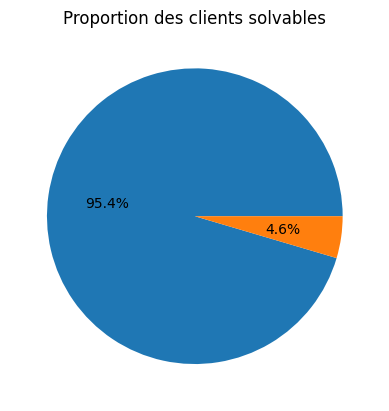

In [ ]:
plt.title("Proportion des clients solvables")
plt.pie(df_test_pred["PREDICTION"].value_counts(),
       autopct='%1.1f%%',
       radius=1)
plt.show()

In [ ]:
# Sauvegarde des prédictions
fichier_prediction_test = 'test_prediction.pickle'
with open(fichier_prediction_test, 'wb') as fichier:
    pickle.dump(df_test_pred, fichier, pickle.HIGHEST_PROTOCOL)

In [ ]:
df_test_pred

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Proba,PREDICTION
0,100001,CASH LOANS,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.023632,0
1,100005,CASH LOANS,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.091035,0
2,100013,CASH LOANS,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,4.0,0.003096,0
3,100028,CASH LOANS,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.001753,0
4,100038,CASH LOANS,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.020379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,CASH LOANS,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.005442,0
48740,456222,CASH LOANS,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.007981,0
48741,456223,CASH LOANS,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0.0,0.0,0.0,0.0,3.0,1.0,0.000928,0
48742,456224,CASH LOANS,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.000838,0


## SHAP

In [ ]:
def display_importances(features_importance_df_, train_set):
    feat_valu = features_importance_df_
    feat_name = train_set.drop(['SK_ID_CURR','TARGET'], axis = 1).columns
    feat_imp = pd.DataFrame()
    feat_imp['feature'] = feat_name
    feat_imp['importance'] = feat_valu
    cols = feat_imp[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feat_imp.loc[feat_imp.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()

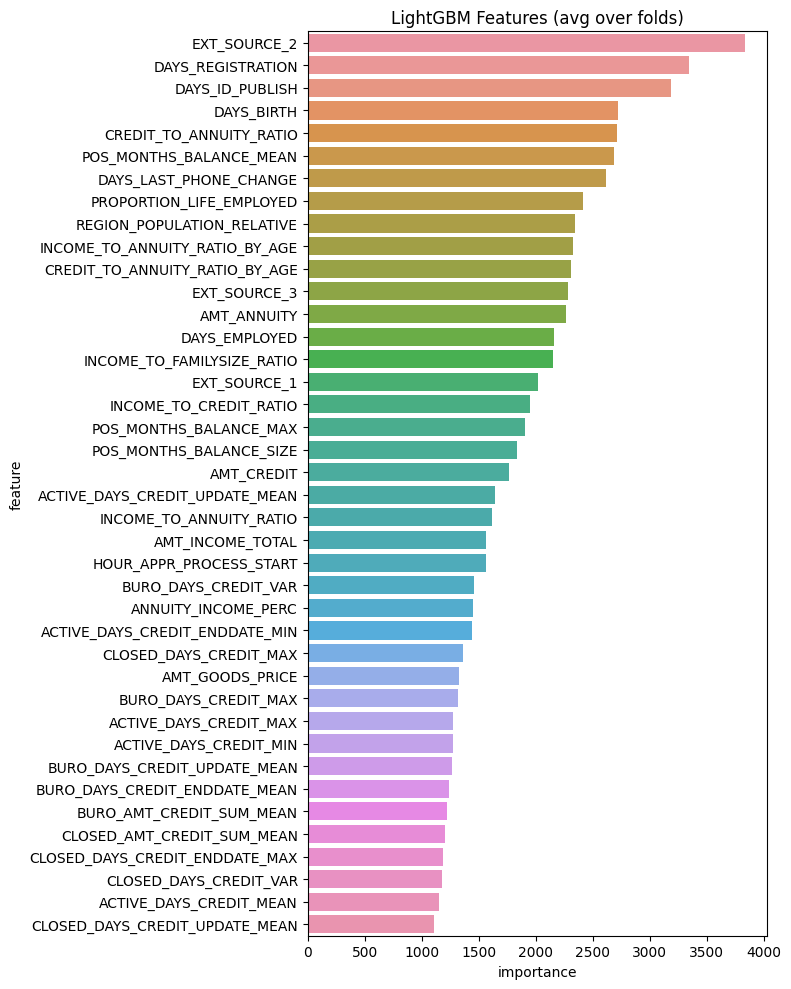

In [ ]:
display_importances(feat_imp_smote, train_sample_set)

In [ ]:
import shap

ModuleNotFoundError: ignored

In [ ]:
#Initialisation de l'environnement essentiel à l'utilisation de SHAP
shap.initjs()

In [ ]:
val_sample_set_t =val_sample_set.drop(columns =["TARGET"])
val_sample_set_0 = val_sample_set_t.reset_index()

In [ ]:
#val_sample_labels = val_sample_labels.astype('float32')
train_sample_labels = train_sample_labels.astype('float32')


explainer_shap = shap.TreeExplainer(model_us)
shap_values = explainer_shap.shap_values(val_sample_set_t)
# Summary plot
shap.summary_plot(shap_values,val_sample_set.drop(columns =["TARGET"]))

In [ ]:
shap.dependence_plot("EXT_SOURCE_2", shap_values[0], val_sample_set.drop(columns =["TARGET"]))

In [ ]:
shap.dependence_plot("EXT_SOURCE_3", shap_values[0], val_sample_set.drop(columns =["TARGET"]))

In [ ]:
shap.dependence_plot("CREDIT_TO_ANNUITY_RATIO", shap_values[0], val_sample_set.drop(columns =["TARGET"]))

In [ ]:
shap.summary_plot(shap_values[1], val_sample_set.drop(columns =["TARGET"]), show=False)

In [ ]:
pickle.dump(shap_values, open( "shap_values.p", "wb" ) )
shap_values = pickle.load( open( "shap_values.p", "rb" ) )

In [ ]:
shap_values

## Local Interpretation

In [ ]:
import random

In [ ]:
idx = random.randint(1, len(val_sample_set))
print("Client numero : ", val_sample_set_0.iloc[idx,0])

shap.force_plot(explainer_shap.expected_value[0], shap_values[0][idx,:], val_sample_set_t.iloc[idx,:])

In [ ]:
val_sample_set_0 = val_sample_set_t.reset_index()
idx = random.randint(1, len(val_sample_set))
print("Client numero : ", val_sample_set_0.iloc[idx,0])

shap.force_plot(explainer_shap.expected_value[0], shap_values[0][idx,:], val_sample_set_t.iloc[idx,:])

## Visualisation pour Dashboard

In [ ]:
shap_values_test = explainer_shap.shap_values(test_features_set)

shap.summary_plot(shap_values,test_features_set)

In [ ]:
test_features_set_0 = test_features_set.reset_index()

In [ ]:
idx = random.randint(1, len(test_features_set))
print("Client numero : ", test_features_set_0.iloc[idx,0])

shap.force_plot(explainer_shap.expected_value[0], shap_values_test[0][idx,:], test_features_set.iloc[idx,:])

# MLFlow Tracking

In [ ]:
'''new_classifiers = {
    'LGB_Basic' : model_0,
    'LGB_Smote' : model_smote,
    'LGB_Undersampling' : model_us
}

mlflow.set_experiment("LGB_Best")
mlflow.lightgbm.autolog()
for model_name, model in new_classifiers.items():
  with mlflow.start_run(run_name = model_name):
    model.fit(X,y)

In [ ]:
'''from pyngrok import ngrok
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2VRaoEcG5R5JVSnLrykMbBcM8yq_oUW1bYfhV1ReQkzdLozF"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

In [ ]:
'''!mlflow ui